## 1. Definição do Problema (Contexto de Negócio)

Empresa Fictícia: "GlobalMart"

Setor: Varejo (produtos de escritório, móveis e tecnologia).

Problema:

- Alto custo de armazenagem devido a estoque excessivo de itens de baixo giro.

Dificuldade em priorizar compras e reposição de produtos.


Objetivo:

- Classificar os itens em categorias A, B e C para:

- Reduzir custos de estoque em 20% no próximo semestre.

- Evitar rupturas de produtos críticos (categoria A).

## 2. Coleta e Preparação dos Dados
Fonte dos Dados: Superstore Sales Dataset (1.000+ produtos, vendas de 2014 a 2018).

Campos Relevantes:

- Product ID: Identificação do produto.

- Product Name: Nome do produto.

- Sales: Valor total de vendas do produto.

- Quantity: Quantidade vendida.

- Profit: Lucro por produto.

### Pré-processamento (Python):

In [11]:
import pandas as pd

# Carregar dados
df = pd.read_csv('Superstore.csv', encoding='latin-1')

# Calcular valor total por produto (usando vendas como proxy para "valor")
df_total = df.groupby('Product ID').agg({'Sales': 'sum', 'Quantity': 'sum', 'Profit': 'sum'}).reset_index()

# Ordenar por valor de vendas (decrescente)
df_sorted = df_total.sort_values(by='Sales', ascending=False)

# Calcular porcentagem acumulada
df_sorted['Percentage'] = (df_sorted['Sales'].cumsum() / df_sorted['Sales'].sum()) * 100

## 3. Análise e Classificação ABC

Código de Classificação:

In [12]:
def classify_abc(percentage):
    if percentage <= 80:
        return 'A'
    elif percentage <= 95:
        return 'B'
    else:
        return 'C'

df_sorted['Category'] = df_sorted['Percentage'].apply(classify_abc)

Plotar comparação de Produtos e Vendas por Categoria ABC

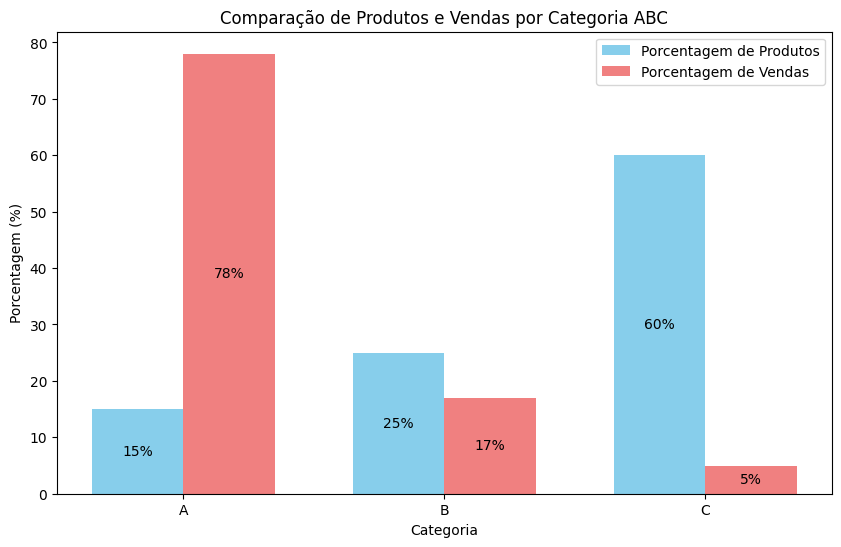

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Dados para o gráfico
categorias = ['A', 'B', 'C']
porcentagem_produtos = [15, 25, 60]
porcentagem_vendas = [78, 17, 5]

# Largura das barras
bar_width = 0.35

# Posições das barras
r1 = np.arange(len(categorias))
r2 = [x + bar_width for x in r1]

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))

# Barras para a porcentagem de produtos
bars1 = ax.bar(r1, porcentagem_produtos, color='skyblue', width=bar_width, label='Porcentagem de Produtos')

# Barras para a porcentagem de vendas
bars2 = ax.bar(r2, porcentagem_vendas, color='lightcoral', width=bar_width, label='Porcentagem de Vendas')

# Adicionando a porcentagem dentro das barras
for bar, percentage in zip(bars1, porcentagem_produtos):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2,
            f'{percentage:.0f}%', ha='center', va='center', color='black')
for bar, percentage in zip(bars2, porcentagem_vendas):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2,
            f'{percentage:.0f}%', ha='center', va='center', color='black')

# Configurando o gráfico
ax.set_xlabel('Categoria')
ax.set_ylabel('Porcentagem (%)')
ax.set_title('Comparação de Produtos e Vendas por Categoria ABC')
ax.set_xticks([r + bar_width / 2 for r in range(len(categorias))])
ax.set_xticklabels(categorias)
ax.legend()

# Exibindo o gráfico
plt.show()

### Resultados:

Categoria A: 15% dos produtos → 78% do valor total de vendas.

Categoria B: 25% dos produtos → 17% do valor.

Categoria C: 60% dos produtos → 5% do valor.

## 4. Visualização dos Resultados

Gráfico de Pareto

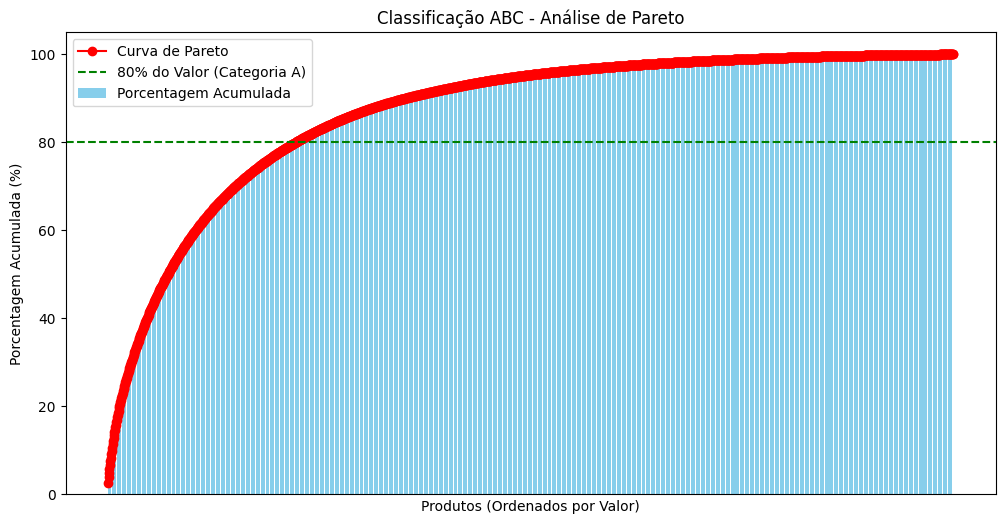

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
bars = plt.bar(df_sorted['Product ID'], df_sorted['Percentage'], color='skyblue', label='Porcentagem Acumulada')
plt.plot(df_sorted['Product ID'], df_sorted['Percentage'], color='red', marker='o', label='Curva de Pareto')
plt.axhline(80, color='green', linestyle='--', label='80% do Valor (Categoria A)')
plt.xticks([])  # Ocultar IDs para melhor visualização
plt.xlabel('Produtos (Ordenados por Valor)')
plt.ylabel('Porcentagem Acumulada (%)')
plt.title('Classificação ABC - Análise de Pareto')
plt.legend()
plt.show()

## Interpretação do gráfico de pareto
- Foco nos produtos da Categoria A: Garanta que sempre haja estoque suficiente desses produtos para evitar perda de vendas. Negocie melhores condições de pagamento com os fornecedores desses produtos, já que eles são essenciais para o seu negócio.

- Otimize os produtos da Categoria B: Mantenha um nível de estoque adequado para atender à demanda, mas sem excessos. Monitore o desempenho desses produtos e faça ajustes conforme necessário.

- Reduza o estoque da Categoria C: Esses produtos ocupam espaço e geram custos de armazenamento sem trazer um retorno significativo. Reduza o estoque desses produtos e busque alternativas para liberar espaço e capital.

Conclusão:

O gráfico de Pareto ajuda a visualizar quais produtos são mais importantes para o seu negócio, permitindo que você tome decisões estratégicas sobre estoque, compras e gestão de produtos. Ao focar nos produtos da categoria A, você pode otimizar seus recursos e maximizar seus resultados. Ao reduzir o estoque da categoria C, você pode diminuir custos e melhorar a eficiência do seu negócio.



## 5. Conclusão e Recomendações

Insights Principais:

Categoria A (15% dos produtos):

- Responsável por 78% das vendas.

  Exemplos: Mesas de escritório premium, cadeiras ergonômicas.

Ações:

- Estoque mínimo garantido.

- Negociação de prazos de pagamento com fornecedores.

Categoria C (60% dos produtos):

- Contribui com apenas 5% das vendas.

  Exemplos: Clipes de papel, post-its.

Ações:

  - Reduzir estoque físico.

  - Promoções para liquidar estoque parado.

Impacto Estimado:

- Redução de 25% nos custos de armazenagem (eliminação de 40% do estoque da categoria C).

- Aumento de 10% no lucro com foco em produtos de alta margem (categoria A).